In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
cols = [a+str(i) for i in range(1,43) for a in list("XYZ")]
cols.append('sign')

In [3]:
df = pd.read_csv('../data/dataset.csv', names=cols)
data = df.copy()
# data

### PREPROCESSING

In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['sign'] = label_encoder.fit_transform(data.iloc[:, -1])
label_encoder.classes_

array([' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'equal',
       'negative', 'positive'], dtype=object)

In [5]:
data

,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,...,X40,Y40,Z40,X41,Y41,Z41,X42,Y42,Z42,sign
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,0.753855,0.780516,-2.783092e-07,0.707944,0.740366,-0.023037,0.665090,0.681268,-0.046624,0.650422,...,0.647332,0.539427,-0.060122,0.621430,0.565719,-0.048807,0.594269,0.562218,-0.038206,13
976,0.754527,0.781368,-2.719811e-07,0.706204,0.740489,-0.024340,0.662884,0.682793,-0.048191,0.645441,...,0.640877,0.539529,-0.071622,0.617393,0.565177,-0.059336,0.593074,0.562472,-0.049709,13
977,0.756121,0.784600,-2.919269e-07,0.708100,0.740174,-0.024545,0.664918,0.682015,-0.049987,0.646768,...,0.644277,0.539889,-0.062538,0.618925,0.567810,-0.051054,0.591736,0.565675,-0.040139,13
978,0.755070,0.779666,-2.660178e-07,0.708111,0.739435,-0.022127,0.665490,0.680687,-0.045329,0.649144,...,0.647579,0.537988,-0.066173,0.623570,0.564143,-0.053956,0.595847,0.562509,-0.044221,13


In [6]:
data.isnull().sum()

X1      0
Y1      0
Z1      0
X2      0
Y2      0
       ..
Z41     0
X42     0
Y42     0
Z42     0
sign    0
Length: 127, dtype: int64

In [7]:
data.sign.value_counts()

0     70
1     70
2     70
3     70
4     70
5     70
6     70
7     70
8     70
9     70
10    70
11    70
12    70
13    70
Name: sign, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.1, shuffle=True)

In [10]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((882, 126), (98, 126), (882,), (98,))

In [11]:
ytrain.value_counts()

1     67
13    66
11    66
8     65
0     65
7     64
2     64
10    63
6     62
12    62
3     61
4     61
9     59
5     57
Name: sign, dtype: int64

### RANDOM FOREST CLASSIFIER

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

In [16]:
pipeline.fit(xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [17]:
pipeline.score(xtrain, ytrain)

1.0

In [19]:
import pprint
pprint.pprint(classification_report(ytest, pipeline.predict(xtest)))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       1.00      1.00      1.00         5\n'
 '           1       0.75      1.00      0.86         3\n'
 '           2       1.00      1.00      1.00         6\n'
 '           3       1.00      1.00      1.00         9\n'
 '           4       1.00      1.00      1.00         9\n'
 '           5       0.92      0.92      0.92        13\n'
 '           6       1.00      1.00      1.00         8\n'
 '           7       0.86      1.00      0.92         6\n'
 '           8       1.00      1.00      1.00         5\n'
 '           9       1.00      0.91      0.95        11\n'
 '          10       1.00      0.86      0.92         7\n'
 '          11       1.00      1.00      1.00         4\n'
 '          12       1.00      1.00      1.00         8\n'
 '          13       1.00      1.00      1.00         4\n'
 '\n'
 '    accuracy                           0.97        98\n'
 '   macro avg       0.97      0.98      0.9

<AxesSubplot:>

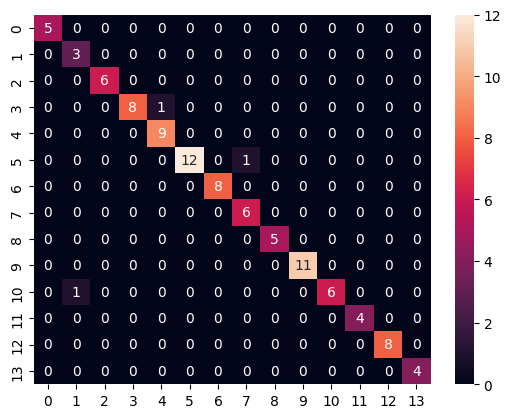

In [51]:
sns.heatmap(confusion_matrix(ytest, pipeline.predict(xtest)), annot=True)

In [21]:
pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier', RandomForestClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': RandomForestClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__bootstrap': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__max_depth': None,
 'classifier__max_features': 'sqrt',
 'classifier__max_leaf_nodes': None,
 'classifier__max_samples': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__n_estimators': 100,
 'classifier__n_jobs': None,
 'classifier__oob_score': False,
 'classifier__random_state': None,
 'classifier__verbose': 0,
 'classifier__warm_start': False}

In [35]:
train_size, train_score, test_score = learning_curve(RandomForestClassifier(), xtrain, ytrain, cv=20, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 60))

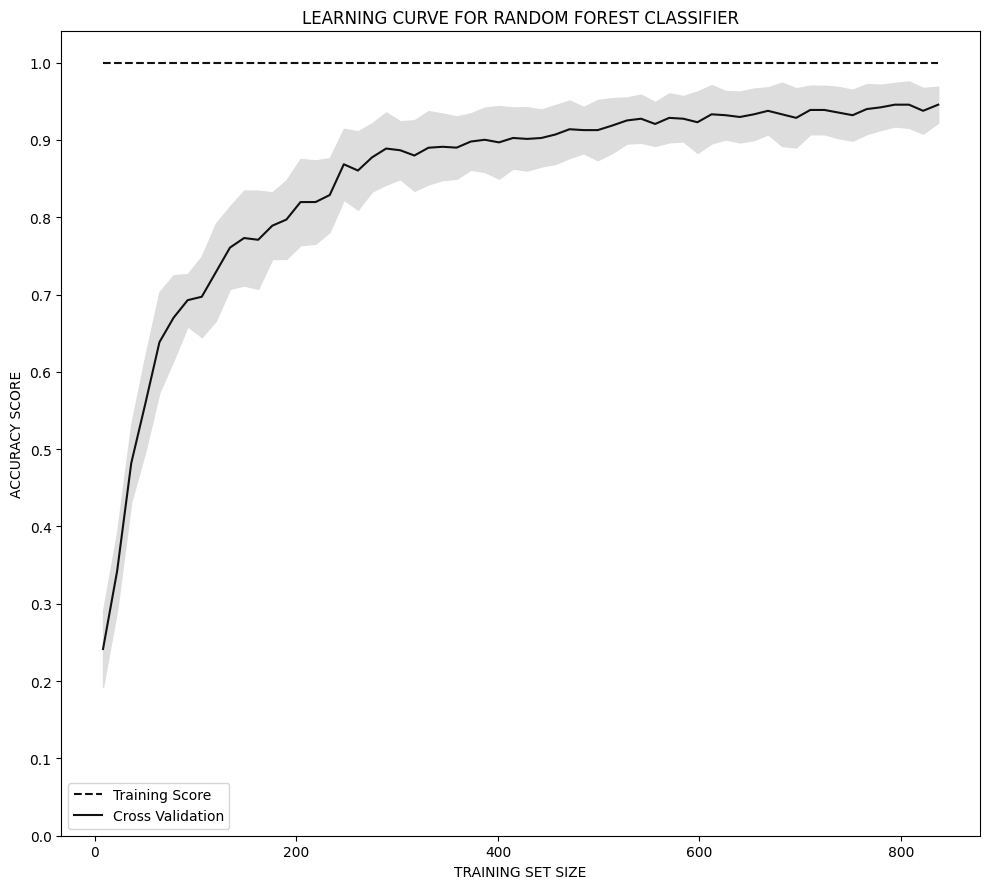

In [36]:
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)

test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

plt.subplots(1, figsize=(10,9))
plt.plot(train_size, train_mean, '--', color='#111111', label='Training Score')
plt.plot(train_size, test_mean, color="#111111", label="Cross Validation")

# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.title('LEARNING CURVE FOR RANDOM FOREST CLASSIFIER')
plt.xlabel("TRAINING SET SIZE")
plt.ylabel("ACCURACY SCORE")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### HYPERPARAMETER TUNING OF THE RANDOM FOREST CLASSIFIER

In [23]:
params = {
    'classifier__max_depth': np.arange(1,25, 2),
    'classifier__n_estimators': np.arange(100,220,20)
}
gridsearch = GridSearchCV(pipeline, params, cv=10)
gridsearch.fit(xtrain, ytrain)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]),
                         'classifier__n_estimators': array([100, 120, 140, 160, 180, 200])})

In [24]:
gridsearch.best_estimator_
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'classifier__max_depth': 21, 'classifier__n_estimators': 140}
0.9523748723186924


In [25]:
train_size, train_score, test_score = learning_curve(RandomForestClassifier(max_depth=21, n_estimators=140), xtrain, ytrain, cv=20, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 60))

In [108]:
# train_size, train_score, test_score

In [26]:
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)

test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

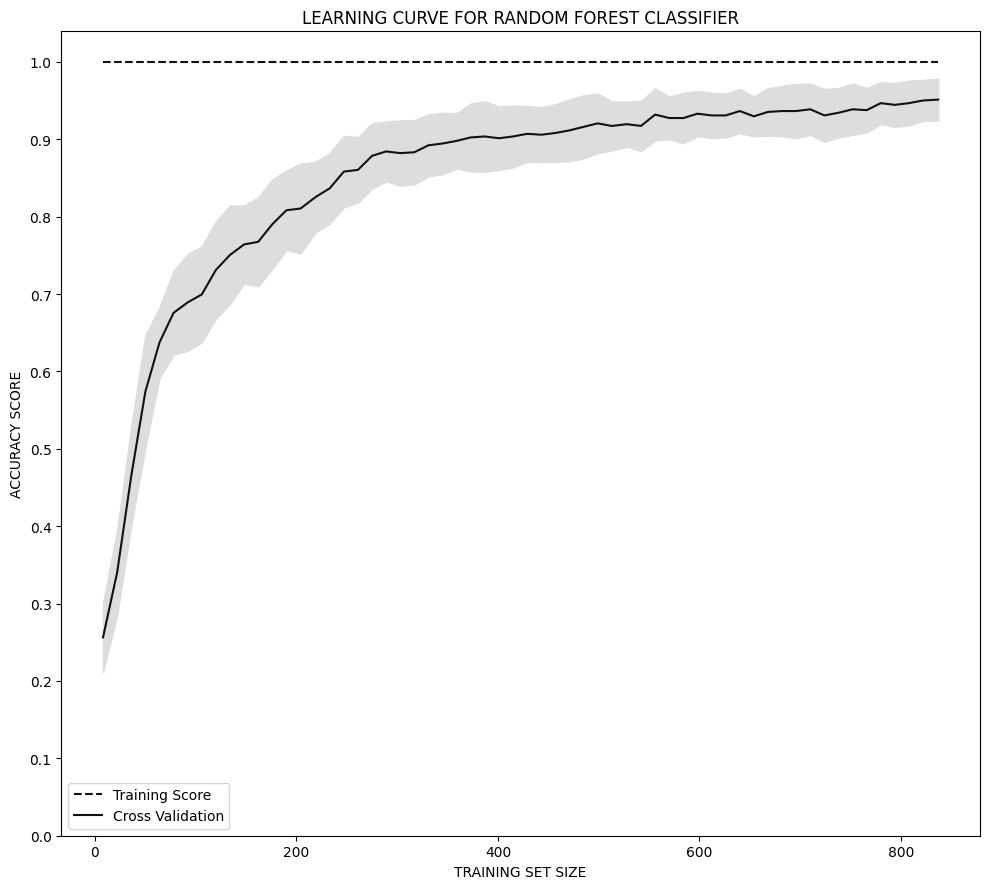

In [27]:
plt.subplots(1, figsize=(10,9))
plt.plot(train_size, train_mean, '--', color='#111111', label='Training Score')
plt.plot(train_size, test_mean, color="#111111", label="Cross Validation")

# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.title('LEARNING CURVE FOR RANDOM FOREST CLASSIFIER WITH TUNED HYPER PARAMETERS')
plt.xlabel("TRAINING SET SIZE")
plt.ylabel("ACCURACY SCORE")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### XGBOOST CLASSIFIER

In [38]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier())
])
pipeline.fit(xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, ...))])

In [39]:
pipeline.score(xtrain, ytrain)

1.0

In [52]:
pprint.pprint(classification_report(ytest, pipeline.predict(xtest)))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       1.00      1.00      1.00         5\n'
 '           1       0.75      1.00      0.86         3\n'
 '           2       1.00      1.00      1.00         6\n'
 '           3       1.00      0.89      0.94         9\n'
 '           4       0.90      1.00      0.95         9\n'
 '           5       1.00      0.92      0.96        13\n'
 '           6       1.00      1.00      1.00         8\n'
 '           7       0.86      1.00      0.92         6\n'
 '           8       1.00      1.00      1.00         5\n'
 '           9       1.00      1.00      1.00        11\n'
 '          10       1.00      0.86      0.92         7\n'
 '          11       1.00      1.00      1.00         4\n'
 '          12       1.00      1.00      1.00         8\n'
 '          13       1.00      1.00      1.00         4\n'
 '\n'
 '    accuracy                           0.97        98\n'
 '   macro avg       0.96      0.98      0.9

<AxesSubplot:>

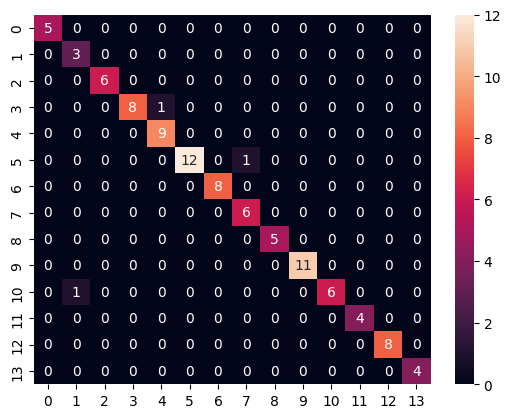

In [53]:
sns.heatmap(confusion_matrix(ytest, pipeline.predict(xtest)), annot=True)

In [42]:
pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier',
   XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                 colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                 early_stopping_rounds=None, enable_categorical=False,
                 eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                 importance_type=None, interaction_constraints='',
                 learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
                 max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
                 missing=nan, monotone_constraints='()', n_estimators=100,
                 n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
                 predictor='auto', random_state=0, reg_alpha=0, ...))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode

#### HYPERPARAMETER TUNING OF THE XGBOOST CLASSIFIER

In [56]:
params = {
    'classifier__max_depth': np.arange(1,25, 2),
    'classifier__n_estimators': np.arange(100,220,20),
    'classifier__learning_rate': np.arange(0.1, 1.0, 0.05)
}
gridsearch = GridSearchCV(pipeline, params)
gridsearch.fit(xtrain, ytrain)

KeyboardInterrupt: 